<a href="https://colab.research.google.com/github/hrushikute/DataAnalytics/blob/master/nltk_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring the NLP space.

In [ ]:
import nltk
nltk.download


<bound method Downloader.download of <nltk.downloader.Downloader object at 0x7f88cd75ad50>>

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')[0:30]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself']

In [ ]:
import pandas as pd

headers = ['label', 'message']
data =pd.read_csv('SMSSpamCollection.csv', sep='|', names=headers)
data.head()
data2 =pd.read_csv('SMSSpamCollection', sep='\t', names=headers , header=None)
data2.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data2.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## Explore the data set

## Find the number of rows and columns of data set

In [ ]:
num_of_rows = len(data2)
num_of_rows

5572

In [ ]:
num_of_cols = len(data2.columns)
num_of_cols

2

In [ ]:
print(f'There are {num_of_rows} of rows and {num_of_cols} of columns in data')

There are 5572 of rows and 2 of columns in data


## Find the number of ham and spam of total rows

In [ ]:
num_of_spam = (data2['label'] == 'spam').sum()
num_of_spam

747

In [ ]:
num_of_ham = (data2['label'] == 'ham').sum()
num_of_ham

4825

In [ ]:
print(f'There are in all {num_of_spam} spam and {num_of_ham} ham out of {num_of_rows}')

There are in all 747 spam and 4825 ham out of 5572


## NLP : Basics To clean the text

1. Remove Punctuation
2. Tokenization
3. Removing Stopwords
4. Lematization/Stemming 

In [ ]:
## Remove punction

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(data):
  # Used list comprehension
  text_noPunct = [char for char in data if char not in string.punctuation]
  return text_noPunct

In [ ]:
data2['clean_message'] = data2['message'].apply(lambda x: remove_punctuation(x))
data2.head()

,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...","[G, o, , u, n, t, i, l, , j, u, r, o, n, g, ..."
1,ham,Ok lar... Joking wif u oni...,"[O, k, , l, a, r, , J, o, k, i, n, g, , w, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ..."
3,ham,U dun say so early hor... U c already then say...,"[U, , d, u, n, , s, a, y, , s, o, , e, a, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ..."


In [ ]:
# Here the clean message have each character as list however we want sentences
# Hence we need to add join by modifying the remove_punctuation function

def remove_punctuation(data):
  # Used list comprehension
  text_noPunct = "".join([char for char in data if char not in string.punctuation])
  return text_noPunct

data2['clean_message_after'] = data2['message'].apply(lambda x: remove_punctuation(x))
data2.head()

,label,message,clean_message,clean_message_after
0,ham,"Go until jurong point, crazy.. Available only ...","[G, o, , u, n, t, i, l, , j, u, r, o, n, g, ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,"[O, k, , l, a, r, , J, o, k, i, n, g, , w, ...",Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,"[U, , d, u, n, , s, a, y, , s, o, , e, a, ...",U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...


In [ ]:
## Tokenize the text
import re

def tokenize_text(data):
  tokens =re.split('\W+',data)
  return tokens

data2['message_tokens'] = data2['clean_message_after'].apply(lambda x: tokenize_text(x.lower()))
data2.head()

,label,message,clean_message,clean_message_after,message_tokens
0,ham,"Go until jurong point, crazy.. Available only ...","[G, o, , u, n, t, i, l, , j, u, r, o, n, g, ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[O, k, , l, a, r, , J, o, k, i, n, g, , w, ...",Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[U, , d, u, n, , s, a, y, , s, o, , e, a, ...",U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [ ]:
## Remove stopwords
import nltk

stop_words = nltk.corpus.stopwords.words('english')


In [ ]:
def remove_stopwords(data):
  clean_data = [word for word in data if word not in stop_words]
  return clean_data
data2['message_after_stop'] = data2['message_tokens'].apply(lambda x: remove_stopwords(x))
data2.head()


,label,message,clean_message,clean_message_after,message_tokens,message_after_stop
0,ham,"Go until jurong point, crazy.. Available only ...","[G, o, , u, n, t, i, l, , j, u, r, o, n, g, ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[O, k, , l, a, r, , J, o, k, i, n, g, , w, ...",Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, ...",Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[U, , d, u, n, , s, a, y, , s, o, , e, a, ...",U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[N, a, h, , I, , d, o, n, t, , t, h, i, n, ...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


## Suplemental Data Cleaning : Using stemming

Test out porter stemer

In [ ]:
import nltk
import re
import pandas as pd
nltk.download('wordnet')

pd.set_option('display.max_colwidth',100)
ps = nltk.PorterStemmer()
stop_words = nltk.corpus.stopwords.words('english')

data3=pd.read_csv('SMSSpamCollection', sep='\t', names=headers , header=None)
data3.head()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
def Pre_process_data(text_data):
  text_noPunct = "".join([char for char in text_data if char not in string.punctuation])
  tokenize_text = re.split('\W+',text_noPunct)
  no_stop_text = [word for word in tokenize_text if word not in stop_words]
  
  return no_stop_text
   

In [ ]:
data3['pre_procs_data'] = data3['message'].apply(lambda x : Pre_process_data(x.lower()))
data3.head()

,label,message,pre_procs_data
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"


In [ ]:
def stemming_data(text_data):
  stem_text = [ps.stem(word) for word in text_data]
  return stem_text

data3['stem_text'] = data3['pre_procs_data'].apply(lambda x : stemming_data(x))
data3.head()


,label,message,pre_procs_data,stem_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


## Apply preprocesig using lemmatizer : Using WordnetLemmatizer

In [ ]:
wn = nltk.WordNetLemmatizer()

def lemmatize_data(text_data):
  lemma_text = [wn.lemmatize(word) for word in text_data]
  return lemma_text

data3['lemmatize_text'] = data3['pre_procs_data'].apply(lambda x : lemmatize_data(x))
data3.head()

,label,message,pre_procs_data,stem_text,lemmatize_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"


## Vectorizing the Data : 
It is used to convert text data to numbers to feed it to Machine learning model

1. CountVectorizer
2. N-gram
3. TF-IDF


In [ ]:
## Let import the data 
import pandas as pd
import re
import string
import nltk
nltk.download('wordnet')

pd.set_option('display.max_colwidth',100)
ps = nltk.PorterStemmer()
stop_words = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

headers = ['label','message']
df = pd.read_csv('SMSSpamCollection', sep='\t',names=headers, header=None)
df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Preporcess Data
1.  Remove punctuation
2.  Tokenize
3.  Remove stop words
4.  Lematize the data

In [ ]:
def PreProcessin_data(text_data):
  puct_removal ="".join([char for char in text_data if  char not in string.punctuation])
  tokenzie_text = re.split('\W+', puct_removal)
  stop_words_removal = [wn.lemmatize(word)   for word in tokenzie_text if word not in stop_words]
  # lema_text= [wn.lemmatize(word) for word in stop_word_removal]
  return stop_words_removal




In [ ]:
df['clean_data'] = df['message'].apply(lambda x: PreProcessin_data(x.lower()))
df.head()

,label,message,clean_data
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, go, usf, life, around, though]"


## CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=PreProcessin_data)

x_count=count_vect.fit_transform(df['message'])

print(x_count.shape)
print(count_vect.get_feature_names())

(5572, 11045)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796XXXXXX', '07973788240', '07XXXXXXXXX', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_count 

<5572x11045 sparse matrix of type '<class 'numpy.int64'>'
	with 56326 stored elements in Compressed Sparse Row format>

Lets use the small data set


In [ ]:
data_sample = df[0:20]
data_sample

,label,message,clean_data
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, go, usf, life, around, though]"
5,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,"[freemsg, hey, darling, 3, week, word, back, id, like, fun, still, tb, ok, xxx, std, chgs, send,..."
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]"
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, caller, pre..."
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[winner, valued, network, customer, selected, receivea, 900, prize, reward, claim, call, 0906170..."
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[mobile, 11, month, u, r, entitled, update, latest, colour, mobile, camera, free, call, mobile, ..."


In [ ]:
x_count_sample = count_vect.fit_transform(data_sample['message'])
x_count_sample

<20x248 sparse matrix of type '<class 'numpy.int64'>'
	with 274 stored elements in Compressed Sparse Row format>

In [ ]:
x_count_df =pd.DataFrame(x_count_sample.toarray())
x_count_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_count_df.columns = count_vect.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_count_df.head()

,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150,150pday,16,2,20000,2005,21st,3,4,4403LDNW1A7RW18,4txtú120,6days,81010,87077,87121,87575,9,900,A,As,Available,CASH,CLAIM,CSH11,Call,Callers,Callertune,Cine,Claim,Co,Cost,Cup,...,set,soon,speak,spell,std,still,stuff,take,talk,team,thank,think,though,time,tkts,today,tonight,treat,txt,u,ur,use,usf,v,valued,want,wat,watching,way,week,wet,wif,win,wkly,wonderful,wont,word,world,wwwdbuknet,xxxmobilemovieclubcomnQJKGIGHJJGCBL
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## N- Gram vectorizer

Have to change the Pre_processing function to have cleaned text in form of sentence

In [ ]:
def pre_process_data_n_gram(text_data):
  no_punct = "".join([char for char in text_data if char not in string.punctuation])
  tokenzie_text = re.split('\W+', no_punct)
  # Note change is made in below line to retain the sentence.
  stop_words_removal = " ".join([word for word in tokenzie_text if word not in stop_words])
  return stop_words_removal


In [ ]:
df['clean_sentence'] = df['message'].apply( lambda x: pre_process_data_n_gram(x.lower()))
df.head()

,label,message,clean_data,clean_sentence
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, go, usf, life, around, though]",nah dont think goes usf lives around though


We still require count vecotrizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect_n_gram = CountVectorizer(ngram_range=(2,2))

In [ ]:
x_count = count_vect_n_gram.fit_transform(df['clean_sentence'])
x_count.shape

(5572, 31990)

In [ ]:
x_count

<5572x31990 sparse matrix of type '<class 'numpy.int64'>'
	with 43788 stored elements in Compressed Sparse Row format>

In [ ]:
count_vect_n_gram.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer(ngram_range=(2, 2))>

Lets view it on sample data

In [ ]:
data_sample = df[:20]
data_sample.count

<bound method DataFrame.count of    label  ...                                                                                       clean_sentence
0    ham  ...                   go jurong point crazy available bugis n great world la e buffet cine got amore wat
1    ham  ...                                                                              ok lar joking wif u oni
2   spam  ...  free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questions...
3    ham  ...                                                                  u dun say early hor u c already say
4    ham  ...                                                          nah dont think goes usf lives around though
5   spam  ...              freemsg hey darling 3 weeks word back id like fun still tb ok xxx std chgs send 150 rcv
6    ham  ...                                                       even brother like speak treat like aids patent
7    ham  ...  per request melle melle oru minn

In [ ]:
x_count_sample = count_vect_n_gram.fit_transform(data_sample['clean_sentence'])
df_x_count_sample = pd.DataFrame(x_count_sample.toarray())
df_x_count_sample.columns = count_vect_n_gram.get_feature_names()
df_x_count_sample

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,09061701461 claim,100 20000,100000 prize,11 months,12 hours,150 rcv,150pday 6days,16 tsandcs,20000 pounds,2005 text,21st may,4txtú120 poboxox36504w45wq,6days 16,81010 tc,87077 eg,87077 trywales,87121 receive,87575 cost,900 prize,aids patent,already say,amore wat,anymore tonight,apply 08452810075over18s,apply reply,around though,available bugis,back id,blessing times,breather promise,brother like,buffet cine,bugis great,call 09061701461,call mobile,callers press,callertune callers,camera free,cash 100,chances win,...,tkts 21st,tonight ive,treat like,trywales scotland,tsandcs apply,txt csh11,txt message,txt ratetcs,txt ur,txt word,update co,update latest,ur national,urgent week,use credit,usf lives,valid 12,valued network,vettam set,want talk,wap link,way feel,way gota,week free,weeks word,wif oni,win cash,win fa,winner valued,wkly comp,wonderful blessing,wont take,word back,word claim,words thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub use,yes naughty
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## TF -IDF vectorizer 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Have to change the preprocessing function to have the data in terms of words.
def pre_process_data_tfidf(text_data):
  no_punct = "".join([char for char in text_data if char not in string.punctuation])
  tokenzie_text = re.split('\W+', no_punct)
  # Note change is made in below line to retain the sentence.
  stop_words_n_lemma = [wn.lemmatize(word) for word in tokenzie_text if word not in stop_words]
  return stop_words_n_lemma



In [ ]:
tf_idf_vec = TfidfVectorizer(analyzer = pre_process_data_tfidf )

x_count=tf_idf_vec.fit_transform(df['message'])

print(x_count.shape)
print(tf_idf_vec.get_feature_names())

data_sample = df[:20]
data_sample.count

x_count_sample = tf_idf_vec.fit_transform(data_sample['clean_sentence'])
df_x_count_sample = pd.DataFrame(x_count_sample.toarray())
df_x_count_sample.columns = tf_idf_vec.get_feature_names()
df_x_count_sample


(5572, 11045)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796XXXXXX', '07973788240', '07XXXXXXXXX', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,08002986030,08452810075over18s,09061701461,1,100,100000,11,12,150,150pday,16,2,20000,2005,21st,3,4,4403ldnw1a7rw18,4txtú120,6days,81010,87077,87121,87575,9,900,aid,already,amore,anymore,apply,around,available,b,back,blessing,breather,brother,buffet,bugis,...,think,though,time,tkts,today,tonight,treat,trywales,tsandcs,txt,u,update,ur,urgent,use,usf,v,valid,valued,vettam,want,wap,wat,watching,way,week,wet,wif,win,winner,wkly,wonderful,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,yes
0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251795,0.000000,0.000000,0.000000,0.251795,0.000000,0.000000,0.000000,0.000000,0.000000,0.251795,0.251795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251795,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251795,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.294083,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.437499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0000,0.198423,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.174417,0.000000,0.198423,0.198423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174417,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.198423,0.000000,0.000000,0.000000,0.000000,0.000000,0.133378,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.174417,0.000000,0.198423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.304187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408943,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.367563,0.367563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.367563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0

## Feature Engineering : Feature Creation

# Read the text 

In [ ]:
import pandas as pd 
headers = ['label','message']
df = pd.read_csv('SMSSpamCollection', sep='\t', names = headers)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# Create a Feature to count the number of character isn meassage exclude the white spaces.

In [ ]:
df['message_len']= df['message'].apply(lambda x:len(x)-x.count(" "))
df.head()

,label,message,message_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92
1,ham,Ok lar... Joking wif u oni...,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
3,ham,U dun say so early hor... U c already then say...,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",49


# Create Feature whith % of text having punctuation


In [ ]:
import string
def count_punct(text):
  count= sum([1 for char in text if char in string.punctuation])
  total_len = len(text)-text.count(" ")
  return (count/total_len)*100
df['percent_punctuation'] = df['message'].apply(lambda x : count_punct(x))
df.head()

,label,message,message_len,percent_punctuation
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.782609
1,ham,Ok lar... Joking wif u oni...,24,25.000000
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.687500
3,ham,U dun say so early hor... U c already then say...,39,15.384615
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.081633


# Evaluate Created Features

In [ ]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

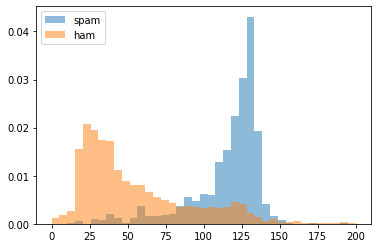

In [ ]:
# Create the bins
bins = np.linspace(0,200,40)
pyplot.hist(df[df['label'] == 'spam']['message_len'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(df[df['label'] == 'ham']['message_len'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc="upper left")
pyplot.show()

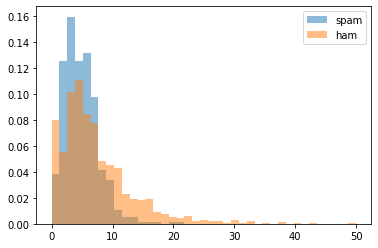

In [ ]:
# Create the bins
bins = np.linspace(0,50,40)
pyplot.hist(df[df['label'] == 'spam']['percent_punctuation'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(df[df['label'] == 'ham']['percent_punctuation'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc="upper right")
pyplot.show()

# check if transformation is require on the features

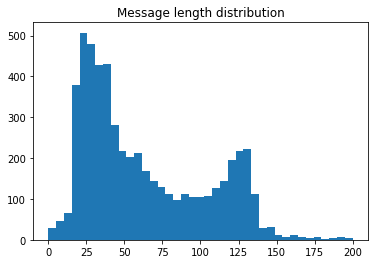

In [ ]:
bins = np.linspace(0,200,40)
pyplot.hist(df['message_len'],bins)
pyplot.title('Message length distribution')
pyplot.show()

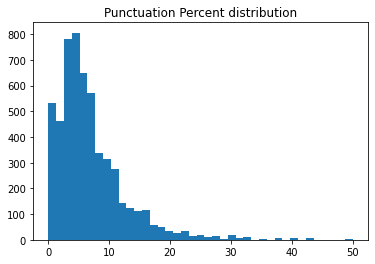

In [ ]:
bins = np.linspace(0,50,40)
pyplot.hist(df['percent_punctuation'],bins)
pyplot.title('Punctuation Percent distribution')
pyplot.show()

## Box cox tranformation on Punction percent distribution

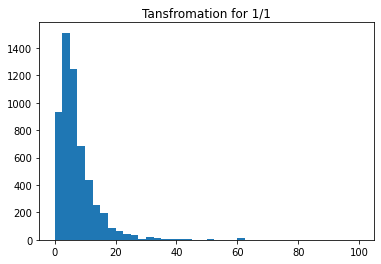

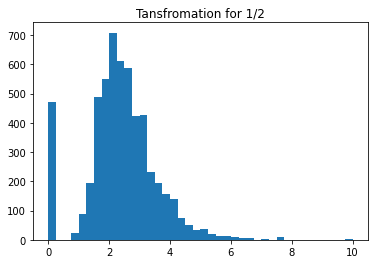

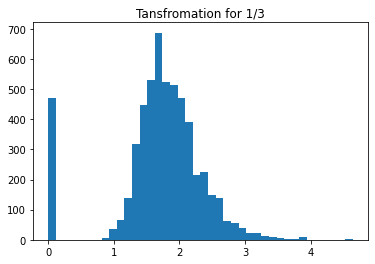

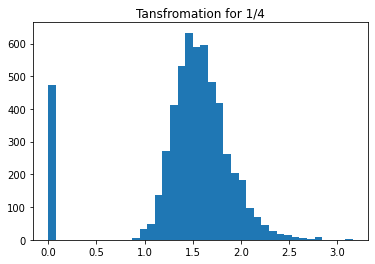

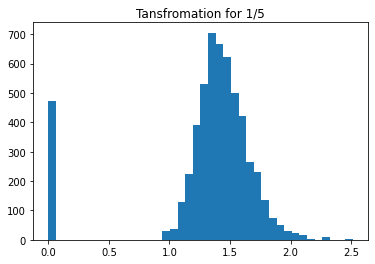

In [ ]:
bins = 40
for i in range(1,6):
  pyplot.hist((df['percent_punctuation'])**(1/i),bins)
  pyplot.title(f"Tansfromation for 1/{i}")
  pyplot.show()
